In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

In [23]:
d2l.use_svg_display()

# Reading the Dataset

In [5]:
batch_size=256

def get_dataloader_workers():
    return 4

In [8]:
# `ToTensor` converts the image data from PIL type to 32-bit floating point tensors. 
# It divides all numbers by 255 so that all pixel values are between 0 and 1
def load_data_fashion_mnist(batch_size,resize=None):
    trans = [transforms.ToTensor()]
    
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans=transforms.Compose(trans)
    
    mnist_train = torchvision.datasets.FashionMNIST(root="./data",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="./data",train=False,transform=trans,download=True)
    
    return(data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=get_dataloader_workers()))

In [9]:
train_iter,test_iter=load_data_fashion_mnist(32,resize=64)
for X,y in train_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [14]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [24]:
X1,y1=next(iter(test_iter))

In [21]:
def get_fashion_mnist_labels(labels):  #@save
    """Return text labels for the Fashion-MNIST dataset."""
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'bag'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pu

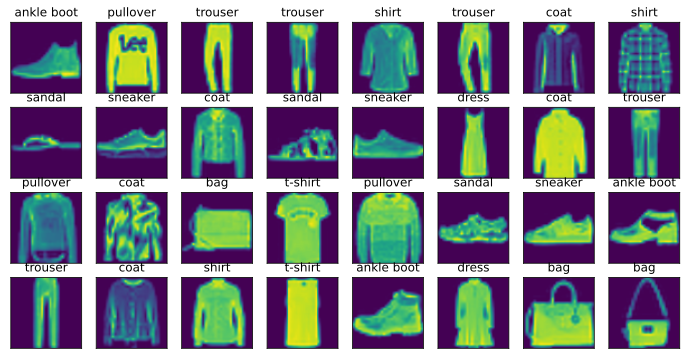

In [25]:
show_images(X1.reshape(32,64,64),4,8,titles=get_fashion_mnist_labels(y1))